<a href="https://colab.research.google.com/github/Srikrishna1987/data-analyst-tools/blob/main/Uber_data_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: write a code to upload a file

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving UberDataset.csv to UberDataset.csv
User uploaded file "UberDataset.csv" with length 87661 bytes


# New section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_csv("UberDataset.csv")

In [ ]:
dataset

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [ ]:
dataset.shape

(1156, 7)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# **Data processing**

In [ ]:
dataset['PURPOSE'].fillna("Not",inplace=True)

<ipython-input-12-3028771620>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("Not",inplace=True)


In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Not
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [ ]:
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors = 'coerce')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [ ]:
from datetime import datetime
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [ ]:
dataset['day-night'] = pd.cut(x=dataset['time'], bins=[0, 10,15,19,24 ], labels=['Morning','Afternoon','Evening','Night'])

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(413, 10)

# **Data Visualization**

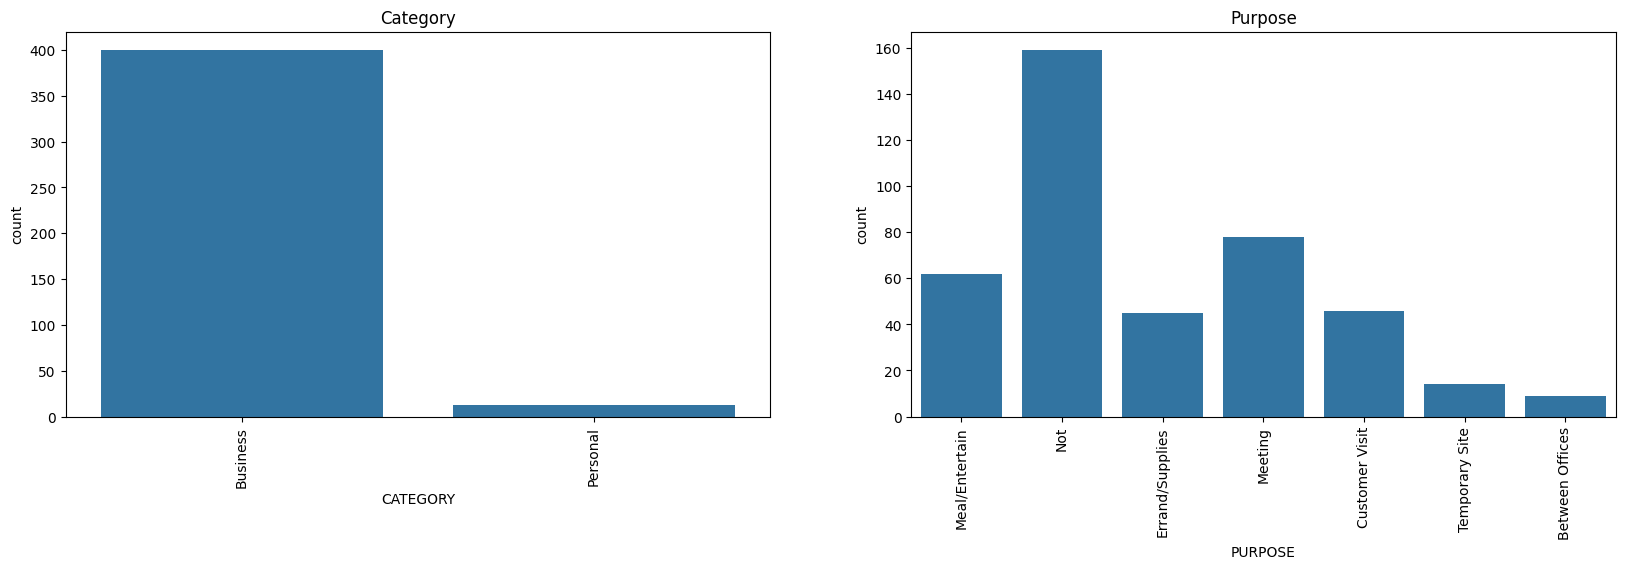

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
sns.countplot(x=dataset['CATEGORY'])
plt.xticks(rotation=90)
plt.title('Category')
plt.subplot(1,2,2)
sns.countplot(x=dataset['PURPOSE'])
plt.xticks(rotation=90)
plt.title('Purpose')
plt.show()



<Axes: xlabel='day-night', ylabel='count'>

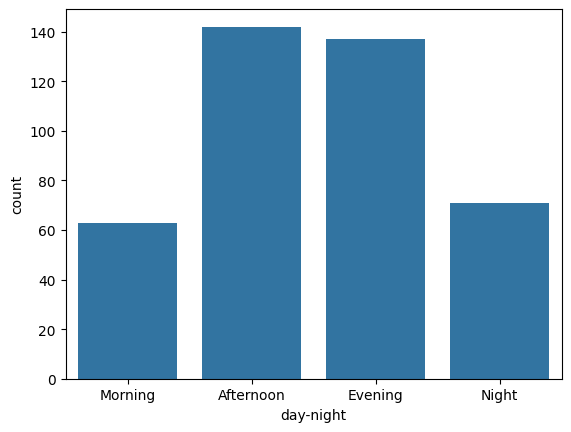

In [ ]:
sns.countplot(x=dataset['day-night'])


In [ ]:
dataset['Month'] =pd.DatetimeIndex(dataset['START_DATE']).month
month_label = {1.0: 'Jan',2.0: 'feb',3.0: 'Mar',4.0: 'April',
               5.0:  'May',6.0: 'June',7.0: 'July',8.0: 'Aug',
               9.0: 'Sept',10.0: 'Oct',11.0: 'Nov',12.0: 'Dec'}
dataset['Month'] = dataset['Month'].map(month_label)
mon = dataset.Month.value_counts(sort=False)

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,Month
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan


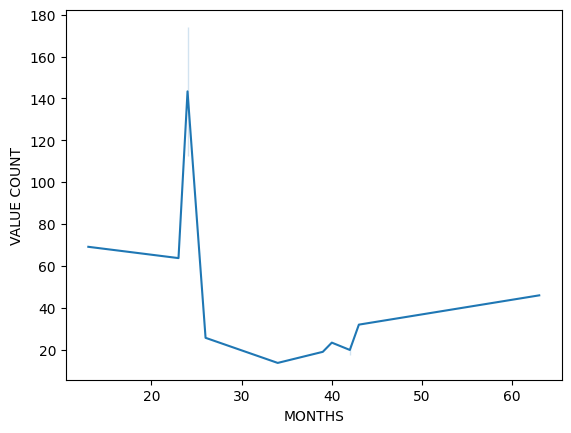

In [ ]:
df = pd.DataFrame({
    "MONTHS": mon.values,
    "VALUE count": dataset.groupby('Month', sort=False)['MILES'].max()

})

p = sns.lineplot(data=df, x="MONTHS", y="VALUE count")
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")
plt.show()

In [ ]:
dataset['DAY'] = dataset.START_DATE.dt.weekday
data_label ={0: 'Monday',1: 'Tuesday',2: 'Wednesday',3: 'Thursday',4: 'Friday',5: 'Saturday',6: 'Sunday'}
dataset['DAY'] = dataset['DAY'].map(data_label)

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,Month,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


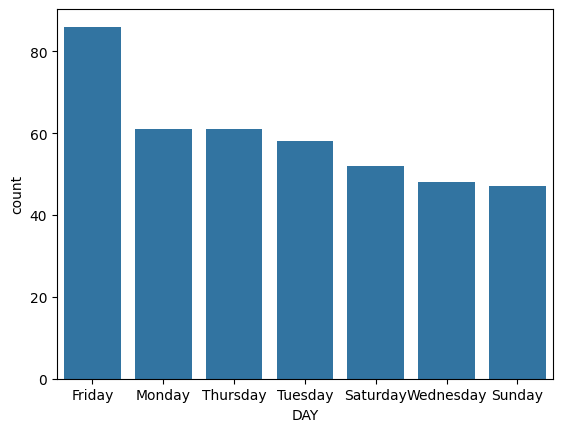

In [ ]:
day_label = dataset.DAY.value_counts()
sns.barplot(x=day_label.index, y=day_label.values)
plt.xlabel('DAY')
plt.ylabel('count')
plt.show()

In [ ]:
dataset.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day-night,Month,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Not,2016-01-02,1.0,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,Jan,Wednesday


<Axes: ylabel='MILES'>

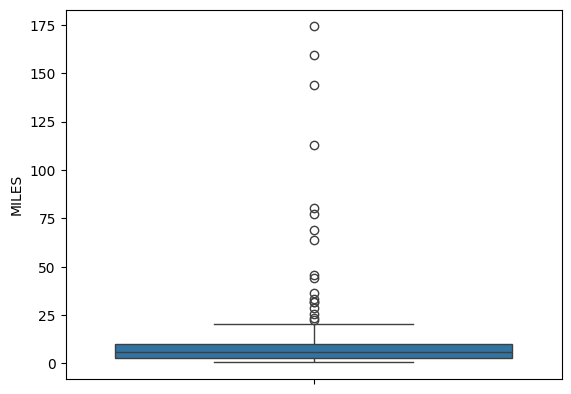

In [ ]:
sns.boxplot(dataset['MILES'])

<Axes: ylabel='MILES'>

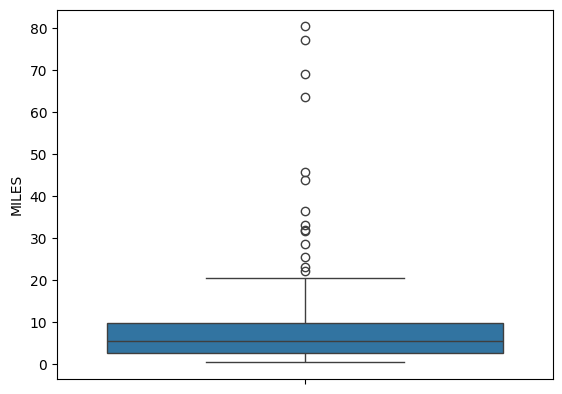

In [ ]:
sns.boxplot(dataset[dataset['MILES']<100]['MILES'])

<ipython-input-50-1678554178>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset['MILES']<40]['MILES'])


<Axes: xlabel='MILES', ylabel='Density'>

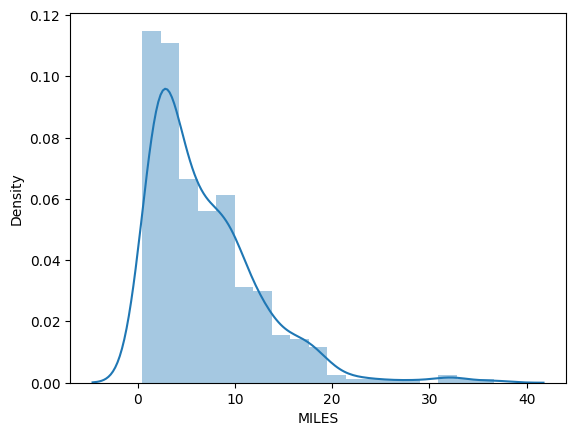

In [ ]:
sns.distplot(dataset[dataset['MILES']<40]['MILES'])

The visualizations reveal insights into the trip data:

Category and Purpose: The plots show the distribution of trips by category (Business and Personal) and the different purposes of the trips.
Time of Day: The day-night distribution indicates when most trips occur (Morning, Afternoon, Evening, or Night).
Monthly Activity: The line plot displays the trend of trip counts over the months, potentially highlighting peak seasons or months with higher activity.
Day of the Week Activity: The bar plot shows the distribution of trips across different days of the week, indicating which days are busiest.
Trip Distance: The box plots of trip miles show the distribution of trip lengths and help identify potential outliers. The distribution plot for trips under 40 miles provides a closer look at the most frequent trip distances.